In [131]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<font size="5" color="red">ch10 N차원 배열 다루기</font>
- [numpy](https://numpy.org/doc/stable/)
- [numpy API](https://numpy.org/doc/stable/reference/index.html)
- N차원 배열 객체
- 2차원 배열은 행렬개념
- numpy 패키지는 c 언어로 구현되어 고성능 수치 계산 패키지
# 1절 넘파이 패키지

In [4]:
import numpy as np # numpy 는 이렇게 import 한다
np.__version__

'1.23.5'

In [6]:
# np.arange(from, stop, step) # from 부터 stop앞까지 step씩 증감한 정수값을 배열로 생성
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열 속성

In [7]:
from numpy import arange
a = arange(15).reshape(3, 5)   #3행 5열로 만들기 위해 reshape 사용 2차원 배열로
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [8]:
type(a) # a 변수의 타입

numpy.ndarray

In [9]:
a.dtype   # a 배열 요소의 type

dtype('int32')

In [10]:
a.dtype.name

'int32'

In [13]:
a.itemsize   # 한 요소의 bytesize

4

In [14]:
a.ndim #차원수(축수)

2

In [16]:
a.size # 배열 요소의 갯수

15

In [17]:
a.shape # 배열의 구조 (튜플)

(3, 5)

In [18]:
## 1.2 배열 변경(구조, 타입)

In [25]:
print('구조변경 전', a, sep = '\n')
a.shape = (5,3)
print('구조변경 후', a, sep = '\n')

구조변경 전
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
구조변경 후
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [27]:
# 타입변경 이렇게 하면 안됨 
a = arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [28]:
a.dtype

dtype('int32')

In [30]:
a.itemsize

4

In [34]:
a.size, a.shape

(6, (3, 2))

In [31]:
a.dtype = np.int64 # a 배열을 읽을 때 64bit씩 읽는다
a.dtype

dtype('int64')

In [32]:
a.itemsize

8

In [33]:
a.size

6

In [35]:
a.size, a.shape

(6, (3, 2))

In [36]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [37]:
# 타입변경 방법
a = arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [41]:
 a = a.astype(np.int64) #a.astype('int64')
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [42]:
a.dtype

dtype('int64')

In [43]:
a.itemsize

8

In [44]:
a.size, a.shape

(12, (3, 4))

In [45]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [46]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [47]:
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [48]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

## 1.3 배열 저장

In [49]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [52]:
import pickle
with open('data/ch10_a.pkl', 'wb') as f:
    pickle.dump(a, f)

In [53]:
with open('data/ch10_a.pkl', 'rb') as f:
    load_a = pickle.load(f)

In [54]:
load_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [56]:
a == load_a

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [57]:
np.all(a == load_a)

True

In [58]:
np.save('data/ch10_a.npy', a)  # 큰 용량을 저장

In [59]:
load_a2 = np.load('data/ch10_a.npy')
np.all(load_a2 == a)

True

# 2절.  넘파이 배열
- array()함수 : 다른 파이썬데이터 구조를 배열로 변환
- arange(), ones(), zeros(), empty()
- 랜덤값을 갖는 함수들 ....
## 2.1 array()함수로 넘파이 배열 만들기
array(리스트나 튜플, dtype=np.xxx)

In [62]:
a = np.array([2,4,6], dtype=np.int8) # 정수의 기본 다입은 int32 / 실수의 기본 타입은 float64
a

array([2, 4, 6], dtype=int8)

In [63]:
a[0], a[1], a[2]

(2, 4, 6)

In [64]:
a.dtype

dtype('int8')

In [66]:
b = np.array([[1.3,2.4],
          [4,5]])
b  # 모두 실수로 나온다

array([[1.3, 2.4],
       [4. , 5. ]])

In [68]:
b.dtype

dtype('float64')

In [72]:
b = np.array([[1.3,2.4],[4,5]], dtype=np.float32).reshape(1,4)
b

array([[1.3, 2.4, 4. , 5. ]], dtype=float32)

In [73]:
b.itemsize

4

In [75]:
b.astype(np.float64)

array([[1.29999995, 2.4000001 , 4.        , 5.        ]])

In [76]:
l = [[1,2],[3.4,4.5]]
for row in l:
    for data in row:
        print(data, end='\t')
    print()

1	2	
3.4	4.5	


In [78]:
c = np.array([[1,2],[3.4,4.5]], dtype=np.float16)
for i, row in enumerate(c):
    for j, item in enumerate(row):
        print("{}행{}열".format(i, j, item), end='\t')
    print()

0행0열	0행1열	
1행0열	1행1열	


In [79]:
c

array([[1. , 2. ],
       [3.4, 4.5]], dtype=float16)

In [82]:
c = np.array([[1, 2, 3, 4, 5], [6,7,8,9,10]], dtype=np.int16)
c

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]], dtype=int16)

In [83]:
c[0,3]

4

In [84]:
c[:, 1:3] # 모든행, 1열부터 3열 앞까지

array([[2, 3],
       [7, 8]], dtype=int16)

In [85]:
c[0, 2:] # 0행 2열부터 ~4열까지

array([3, 4, 5], dtype=int16)

In [87]:
c[:, 4:]   , c[:, :4]

(array([[ 5],
        [10]], dtype=int16),
 array([[1, 2, 3, 4],
        [6, 7, 8, 9]], dtype=int16))

In [90]:
# 모든행의 맨 마지막 열만 추출
c[:,-1]

array([ 5, 10], dtype=int16)

In [91]:
# 모든행의 맨 마지막 열을 제외한 추출
c[:, :-1]  맨 마지막을 제외하고 추출

array([[1, 2, 3, 4],
       [6, 7, 8, 9]], dtype=int16)

In [99]:
c = np.array([[1,2],[3,4]])
d = np.array(c, copy=False)   # d=c   얕은복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print(id(c), id(d))

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[   1    2]
 [3333    4]]
d=
[[   1    2]
 [3333    4]]
3055337250352 3055337250352


In [100]:
c = np.array([[1,2],[3,4]])
d = np.array(c, copy=True)   # d=c.copy   깊은복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print(id(c), id(d)) # 깊은 복사로 인해서 주소도 바뀌었음

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[1 2]
 [3 4]]
d=
[[   1    2]
 [3333    4]]
3055336476368 3055336474640


## 2.2 기본값이 있는 배열만들기
- np.zeros((tup)) : 요소들이 다 0
- np.ones((tup)) : 요소들이 다 1
- np.full(tup, 기본값) : 요소들이 다 기본값
- np.empty(tup) : 요소들이 임의의 값(메모리 상태에 따라 달라짐)
 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64. dtype 속성 따라 지정 가능

In [102]:
np.zeros((3, 5), dtype=np.int8)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int8)

In [105]:
x = np.ones((3, 5))
x, x.dtype

(array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]),
 dtype('float64'))

In [106]:
np.full((2,5), -256)

array([[-256, -256, -256, -256, -256],
       [-256, -256, -256, -256, -256]])

In [108]:
np.empty(2,5)

TypeError: Cannot interpret '5' as a data type

## 2.3 랜덤값을 갖는 배열 만들기
- np.random.random(tup) : 0부터 1 미만의 균등분포를 갖는 랜덤값
- np.random.uniform(low=0, high=1.0, size=tup) : low 부터 high 미만의 균등분포를 갖는 랜덤값
- np.random.normal(loc=0, scale=1.0, size=tup) : 평균loc과 표준편차scale을 갖는 정규분포 랜던값
- np.random.rand(n) : 균등분포 1차원 난수 배열 발생(난수 n개)
- np.random.randn(n) : 표준정규분포(평균0, 표준편차가1인 정규분표)의 1차원 난수 배열 발생)
 (난수 n개)
cf np.random.randint(n) : 0부터 n미만의 정수 난수 1개 발생

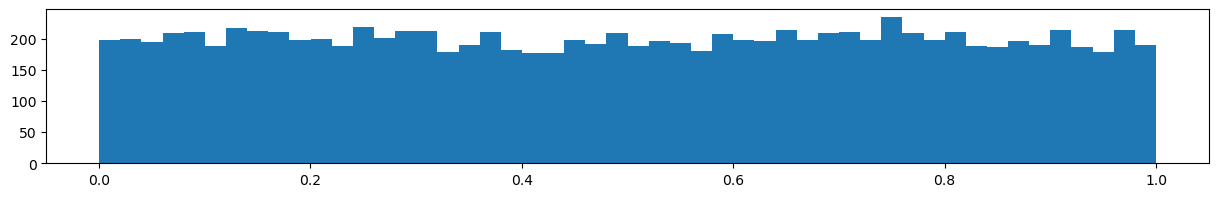

In [113]:
import matplotlib.pyplot as plt
x = np.random.rand(10000)
plt.figure(figsize=(15,2))    # 그래프 크기 figsize(가로, 세로)
plt.hist(x, bins=50)
plt.show()

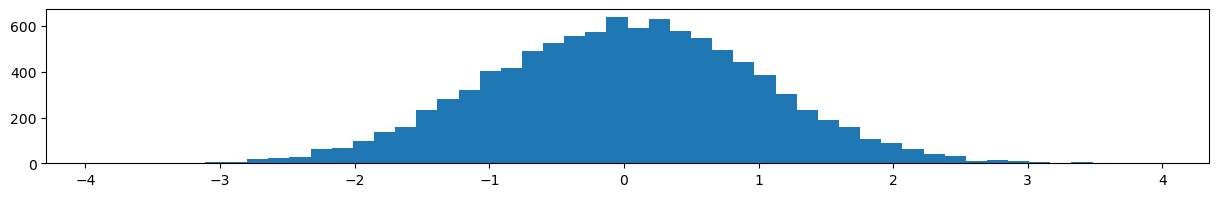

In [114]:
x = np.random.randn(10000)
x = np.random.randn(10000)
plt.figure(figsize=(15,2))    # 그래프 크기 figsize(가로, 세로)
plt.hist(x, bins=50)
plt.show()

In [116]:
# 2차원 난수 배열
np.random.seed(12) # seed값을 맞추면 발생되는 난수 순서가 동일
np.random.random((2,5)) # 0부터 1미만 균등분포 난수 배열

array([[0.15416284, 0.7400497 , 0.26331502, 0.53373939, 0.01457496],
       [0.91874701, 0.90071485, 0.03342143, 0.95694934, 0.13720932]])

In [117]:
np.random.uniform(-1,10, (2,5)) #-1 ~ 10 미만의 균등분포 난수 배열


array([[ 2.12211188,  5.66691503,  9.3864765 ,  8.38009095, -0.97514843],
       [ 4.7334863 ,  5.07241397,  4.33915155,  7.44947569,  0.76788428]])

In [118]:
np.random.normal(10, 2, (2, 5)) # 평균10, 표준편차 2인 정규분포 난수 배열

array([[12.19191224,  7.5696624 , 12.68471274,  9.75570042, 12.02503095],
       [ 8.17226171,  7.94093959, 12.4195929 , 11.00374461, 10.27769235]])

## 2.4 연속된 값을 갖는 배열 만들기
- np.arange(from, stop, by, dtype) : from 부터 stop앞까지 by 씩 증감하는 정수 배열
- np.linspace(from, to ,count) : from부터, to 까지 count개 숫자를 1차원 배열

In [119]:
np.linspace(0, 2, 20)

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

In [127]:
# linspace : 많은 수의 점들을 생성
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

<function matplotlib.pyplot.show(close=None, block=None)>

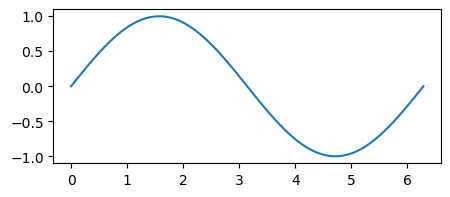

In [128]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2))
plt.plot(x, y)
plt.show

In [129]:
np.linspace(0, 2, 20).reshape(2, 10)

array([[0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842],
       [1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]])

In [130]:
np.arange(10, 30, 3, dtype=np.int8)

array([10, 13, 16, 19, 22, 25, 28], dtype=int8)

## 2.5 배열의 차원 변경하기
- reshape([면수], 행수, 열수) : -1이 올 수도
- resize([면수], 행수, 열수) : -1 불가
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환
※ 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열 수정됨

In [132]:
a = np.random.random((2,3))
a

array([[0.76747565, 0.82500925, 0.4066403 ],
       [0.45130841, 0.40063163, 0.99513816]])

In [133]:
a *10

array([[7.67475651, 8.25009253, 4.06640302],
       [4.51308411, 4.00631627, 9.9513816 ]])

In [135]:
a = np.round(a*10) # round : 반오림 / floor : 내림 / ceil : 올림
a

array([[ 8.,  8.,  4.],
       [ 5.,  4., 10.]])

In [138]:
a = a.reshape(3,2)
a

array([[ 8.,  8.],
       [ 4.,  5.],
       [ 4., 10.]])

In [139]:
a.reshape(2, -1) # -1이 주어지면 해당 차원의 크기가 자동 계산  자동으로 계산 되어서 2를 행으로 넣어서 3이 열로 나오게 된다

array([[ 8.,  8.,  4.],
       [ 5.,  4., 10.]])

In [142]:
a = a.reshape(-1, 1)  # 행에 넣어도 열이 자동으로 계산이 된다. 
a

array([[ 8.],
       [ 8.],
       [ 4.],
       [ 5.],
       [ 4.],
       [10.]])

In [143]:
a.resize((2,3)) # 결과를 출력하지 않는 함수는 배열을 바꿈 여기에서는 -1을 사용할수 없다. 

In [144]:
a

array([[ 8.,  8.,  4.],
       [ 5.,  4., 10.]])